# 1. PDF(Probability Density Function)
- **확률 밀도 함수**
- 데이터셋의 분포를 나타냄
- 특정 구간의 확률은 그래프 아래 그 구간의 면적과 동일하다.
- 그래프 아래의 모든 면적을 더하면 1이 된다.
- 특정 값이 일어날 확률은 0%(특정 범위만 0이 넘는 확률)

# 2. KDE Plot (Kernel Density Estimation)
- 실제 데이터는 굴곡이 많은 곡선이 됨
- KDE는 부드러운 곡선으로 만들어줌 (lim같은 개념)

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
body_df = pd.read_csv('data/body.csv', index_col=0)
body_df.head()

,Height,Weight
Number,,
1,176.0,85.2
2,175.3,67.7
3,168.6,75.2
4,168.1,67.1
5,175.3,63.0


In [4]:
body_df['Height'].value_counts().sort_index()

154.4    1
155.5    1
157.4    1
157.8    1
158.0    1
        ..
190.3    1
191.2    1
191.8    1
192.4    1
193.1    1
Name: Height, Length: 262, dtype: int64

<AxesSubplot:>

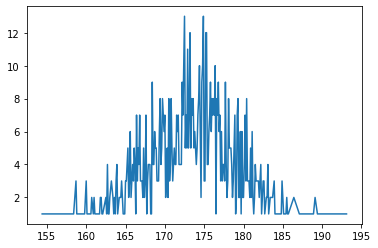

In [5]:
body_df['Height'].value_counts().sort_index().plot()

<AxesSubplot:xlabel='Height', ylabel='Density'>

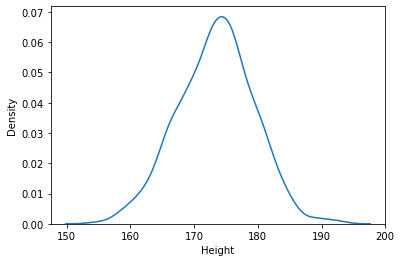

In [6]:
sns.kdeplot(body_df['Height']) #KDE 곡선으로 (확률밀도함수)

- 실제 분포는 아니고 추측으로 완만한 곡선으로 만든 것

C:\Users\ksjpt\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

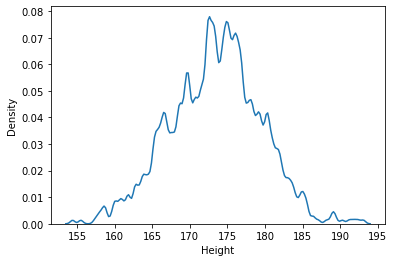

In [7]:
sns.kdeplot(body_df['Height'], bw=0.05) #bw로 완만한 정도 조절

<AxesSubplot:ylabel='Frequency'>

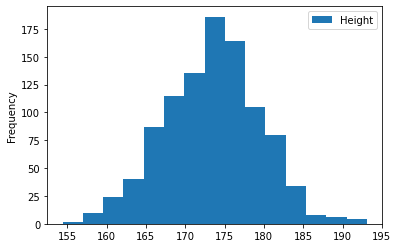

In [8]:
body_df.plot(kind='hist', y='Height', bins=15)

C:\Users\ksjpt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

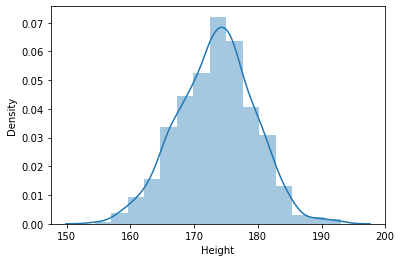

In [9]:
sns.distplot(body_df['Height'], bins=15) #히스토그램 위에 KDE

<AxesSubplot:>

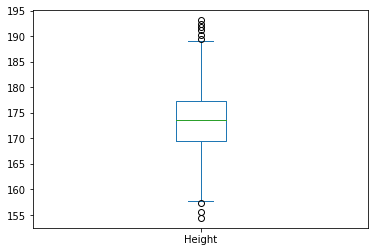

In [10]:
body_df.plot(kind='box', y='Height')

<AxesSubplot:ylabel='Height'>

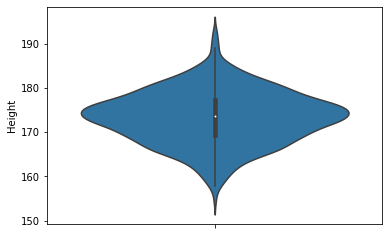

In [11]:
#바이올린플롯 - 분포 전체
sns.violinplot(y=body_df['Height']) #KDE 대칭

<AxesSubplot:xlabel='Height', ylabel='Weight'>

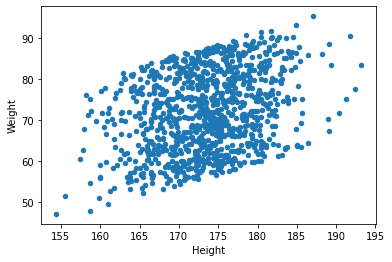

In [12]:
body_df.plot(kind='scatter', x='Height', y='Weight')

C:\Users\ksjpt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Weight'>

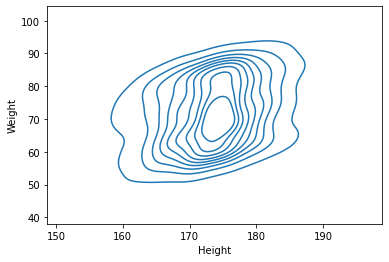

In [13]:
#등고선 - 높낮이
# 선들이 가까울수록 가파름
sns.kdeplot(body_df['Height'], body_df['Weight'])

# 3. LM Plot

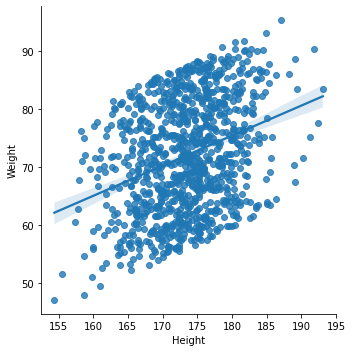

In [15]:
sns.lmplot(data=body_df, x='Height', y='Weight')

- 회귀선

# 4. 카테고리별 시각화

In [16]:
laptops_df = pd.read_csv('data/laptops.csv')
laptops_df.head()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN


In [19]:
laptops_df['os'].unique()

array(['linux', 'mac', 'windows'], dtype=object)

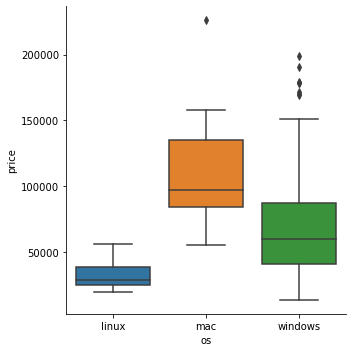

In [20]:
#os별로(category) 시각화
sns.catplot(data=laptops_df, x='os', y='price', kind='box')

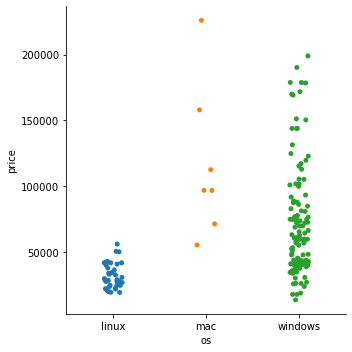

In [21]:
sns.catplot(data=laptops_df, x='os', y='price', kind='strip')

In [22]:
laptops_df['processor_brand'].unique()

array(['intel', 'amd'], dtype=object)

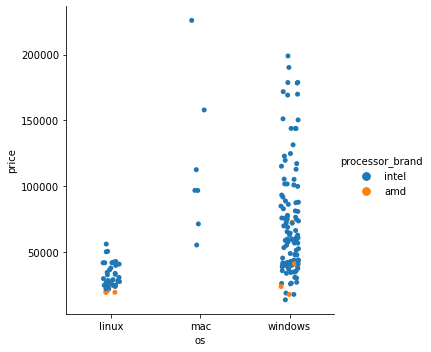

In [23]:
#hue : 색깔
sns.catplot(data=laptops_df, x='os', y='price', kind='strip', hue='processor_brand')

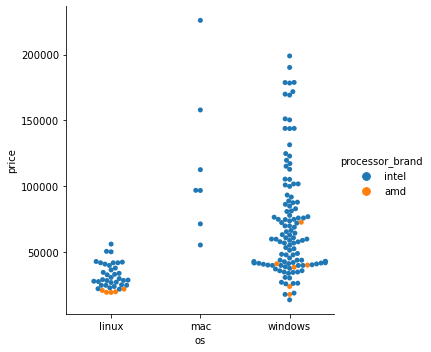

In [26]:
# 점들을 펼쳐서 볼 수 있음
sns.catplot(data=laptops_df, x='os', y='price', kind='swarm', hue='processor_brand')